<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/MAT422_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the example matrix for QR decomposition:
 [[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
Here is the Q decomposition:
 [[ 0.8571 -0.3943 -0.3314]
 [ 0.4286  0.9029  0.0343]
 [-0.2857  0.1714 -0.9429]]
Here is the transpose of Q decomposition:
 [[ 0.8571  0.4286 -0.2857]
 [-0.3943  0.9029  0.1714]
 [-0.3314  0.0343 -0.9429]]
Here is the R matrix:
 [[ 1.4000e+01  2.1000e+01 -1.4000e+01]
 [-2.2204e-16  1.7500e+02 -7.0000e+01]
 [-1.3323e-15 -9.7700e-14  3.5000e+01]]
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
Here is the Q matrix:
 [[ 0.8944  0.1826]
 [-0.4472  0.3651]
 [ 0.      0.9129]]
Here is the R matrix:
 [[ 2.2361e+00 -4.4721e-01]
 [-5.5511e-17  2.1909e+00]]
Here is the orthogonal projection matrix:
 [[ 0.8333 -0.3333  0.1667]
 [-0.3333  0.3333  0.3333]
 [ 0.1667  0.3333  0.8333]]
[[ 2.0000e+00  5.7370e-17]
 [-1.0000e+00  1.0000e+00]
 [-5.0675e-17  2.0000e+00]]
The least squares solution is:
 [[ 0.6667]
 [-0.6667]
 [-0.6667]]


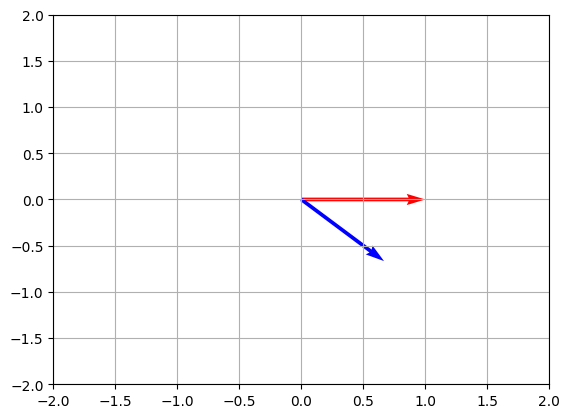

0.1173333333333335 50.35999999999997


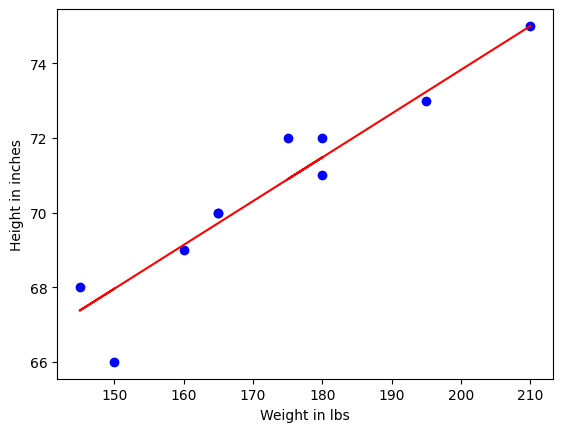

In [43]:
## HW 1 - Ivan Matyushov
## MAT 422 - Mathematical Methods in Data Science

## Part 1 - QR Decomposition
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[12.0, -51.0, 4.0], [6.0, 167.0, -68.0], [-4.0, 24.0, -41.0]])
n = A.shape[1]#extracts number of columns from A matrix
print("Here is the example matrix for QR decomposition:\n", A)


for j in range(n):
# Orthogonalizes the vector in column j by subtracting
# its projection onto each of the previous vectors.
   for k in range(j):
      A[:, j] = A[:, j] - np.dot(A[:, k], A[:, j]) * A[:, k]
   A[:, j] = A[:, j] / np.linalg.norm(A[:, j]) #Normalizes all the vectors
np.set_printoptions(precision=4) #Set decimal values allowed in display of numbers
Q = A
A_old = np.array([[12.0, -51.0, 4.0], [6.0, 167.0, -68.0], [-4.0, 24.0, -41.0]]) #here to keep old A matrix
print("Here is the Q decomposition:\n", Q) #Gram-schmidt process gives us Q
q_transpose = Q.transpose()
print("Here is the transpose of Q decomposition:\n", q_transpose)
R = q_transpose @ A_old
print("Here is the R matrix:\n", R)
#Multiplication of transpose of Q by original matrix gives R
#Can confirm QR decomp by multiplying Q and R
qr = Q @ R
print(qr)
#Got the same A matrix back so this QR decomposition is correct

## Part 2 - Least Squares Problem
A1 = np.array([[2.0, 0.0], [-1.0,1.0], [0.0, 2.0]])
b = np.array([[1.0], [0.0], [-1.0]])
n = A1.shape[1]#extracts number of columns from A matrix
for j in range(n): #Finding Q of new matrix
   for k in range(j):
      A1[:, j] = A1[:, j] - np.dot(A1[:, k], A1[:, j]) * A1[:, k]
   A1[:, j] = A1[:, j] / np.linalg.norm(A1[:, j])
Q1 = A1
A1_old = A1 = np.array([[2.0, 0.0], [-1.0,1.0], [0.0, 2.0]])
print("Here is the Q matrix:\n", Q1)
#Orthogonal Projection Matrix:
R1 = Q1.transpose() @ A1_old
print("Here is the R matrix:\n", R1)
orth_proj = Q1 @ Q1.transpose()
print("Here is the orthogonal projection matrix:\n", orth_proj)
A_x = orth_proj @ b # Ax = QQtb
qr1 = Q1 @ R1 # Q1 * R1 gets A matrix so Q & R correct
print(qr1)
print("The least squares solution is:\n", A_x)

#Plotting the least squares solution
v1 = b
v2 = A_x #Least squares solution vector
fig, ax = plt.subplots()

ax.quiver(0,0,v1[0],v1[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(0,0,v2[0],v2[1], angles='xy', scale_units='xy', scale=1, color='b')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

plt.grid()
plt.show()
# This is the closest Ax can get to the b vector

## Part 3 - Linear Regression
height = np.array([66.0, 68.0, 69.0, 70.0, 70.0, 71.0, 72.0, 72.0, 73.0, 75.0])
weight = np.array([150.0, 145.0, 160.0, 165.0, 165.0, 180.0, 175.0, 180.0, 195.0, 210.0])
mean_ht = np.mean(height)
mean_wt = np.mean(weight)
n = len(weight)
top = 0
bot = 0
for i in range(n):
  top = (weight[i] - mean_wt) * (height[i] - mean_ht)
  bot = (weight[i] - mean_wt) ** 2
  m = top / bot
  c = mean_ht - (m * mean_wt)

print(m,c) #The slope and y-intercept of the dataset
y_eqn = c + m * weight #equation of regression line
# Ploting Regression Line
plt.plot(weight, y_eqn, color='r', label='Regression Line')
# Plot data points
plt.scatter(weight, height, c='b', label='Scatter Plot')
plt.xlabel('Weight in lbs')
plt.ylabel('Height in inches')
plt.show()